In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import math

In [47]:
dataframe=pd.read_csv('signals.csv')                               #reading the csv file and storing it in a dataframe of Pandas.

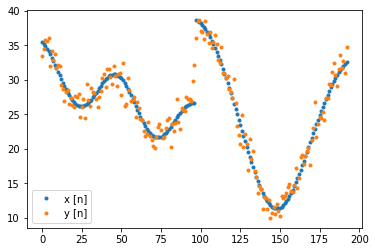

In [48]:
pl.plot(dataframe['n'],dataframe['x[n]'],'.',label='x [n]')
pl.plot(dataframe['n'],dataframe['y[n]'],'.',label='y [n]')
pl.legend(loc='lower left')

In [49]:
dataframe

,x[n],y[n],n
0,35.4312,33.3735,0
1,35.1511,34.3744,1
2,34.8284,35.7514,2
3,34.4656,35.5869,3
4,34.0656,36.0826,4
...,...,...,...
188,31.4198,33.5967,188
189,31.7396,31.7135,189
190,32.0228,32.6819,190
191,32.2673,30.9260,191


In [50]:
Hk=[]
w=(2*math.pi)/193                                              
for k in range(5):                                             #calculating fourier transform of h
    Hk.append(((1/8)*math.cos(2*w*k)+(1/2)*math.cos(k*w)+(3/8)))

During calulating fouriers of h and yn, we are only taking 5 values of k..if we will take 193 values the at then it will create problem as Hk will be tending to 0.. which will affect Xjw..so for convenience we took k=5. we can increse value of k to 60,70 but that is not affecting our final result.

In [51]:
dataframe.loc[range(5),'H(k)']=Hk

In [52]:
def rotate(number, radians):
    n = number
    return (math.e**(radians*1j)) * n

In [53]:
yn=dataframe['y[n]'].to_numpy()

In [54]:
Yk=[]
a=(2*math.pi)/193
for k in range(5):                                     #calculating fourier transform of yn
    sum=0
    for n in range(193):
        sum=sum+rotate(yn[n],-(n*a*k))
    Yk.append(sum)

In [55]:
dataframe.loc[range(5),'Y(k)']=Yk

In [56]:
Xjw=np.array(Yk)/np.array(Hk)

In [57]:
deblurred_yn=[]
for n in range(193):
    sum=0
    for k in range(5):
        sum=sum+rotate(Xjw[k],k*a*n)
    deblurred_yn.append(sum/193)

In [58]:
dataframe.loc[:,'Deblurred y[n]']=deblurred_yn

In [59]:
dataframe

,x[n],y[n],n,H(k),Y(k),Deblurred y[n]
0,35.4312,33.3735,0,1.000000,4914.894005+0.000000j,29.374611-2.012663j
1,35.1511,34.3744,1,0.999470,-9.613725-0435.2152460j,29.373716-1.702454j
2,34.8284,35.7514,2,0.997882,584.349625-306.374626j,29.345838-1.399907j
3,34.4656,35.5869,3,0.995240,18.814657+440.812213j,29.292028-1.107662j
4,34.0656,36.0826,4,0.991551,158.182020-88.142548j,29.213626-0.828243j
...,...,...,...,...,...,...
188,31.4198,33.5967,188,NaN,N0000000000a0000000000N,28.958434-3.582547j
189,31.7396,31.7135,189,NaN,N0000000000a0000000000N,29.097790-3.275229j
190,32.0228,32.6819,190,NaN,N0000000000a0000000000N,29.209367-2.961860j
191,32.2673,30.9260,191,NaN,N0000000000a0000000000N,29.292741-2.645137j


C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


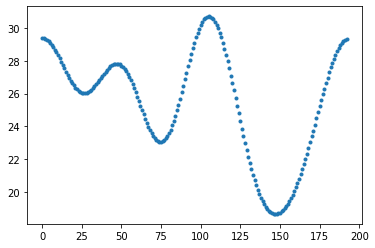

In [60]:

pl.plot(dataframe['n'],dataframe['Deblurred y[n]'],'.')

In [61]:
n=len(deblurred_yn)
xn2=[]                                
for i in range(n):                               # we are now denoising the deblurred_yn 
    if i==0:
        xn2.append((deblurred_yn[0]+deblurred_yn[1])/2)
    elif i==n-1:
        xn2.append((deblurred_yn[n-2]+deblurred_yn[n-1])/2)
    else:
        xn2.append((deblurred_yn[i-1]+deblurred_yn[i]+deblurred_yn[i+1])/3)

In [62]:
dataframe.loc[:,'x[n]2']=xn2                        # xn2 is obtained after deblurring and then denoising yn

In [63]:
dataframe

,x[n],y[n],n,H(k),Y(k),Deblurred y[n],x[n]2
0,35.4312,33.3735,0,1.000000,4914.894005+0.000000j,29.374611-2.012663j,29.374164-1.857559j
1,35.1511,34.3744,1,0.999470,-9.613725-0435.2152460j,29.373716-1.702454j,29.364722-1.705008j
2,34.8284,35.7514,2,0.997882,584.349625-306.374626j,29.345838-1.399907j,29.337194-1.403341j
3,34.4656,35.5869,3,0.995240,18.814657+440.812213j,29.292028-1.107662j,29.283831-1.111938j
4,34.0656,36.0826,4,0.991551,158.182020-88.142548j,29.213626-0.828243j,29.205968-0.833310j
...,...,...,...,...,...,...,...
188,31.4198,33.5967,188,NaN,N0000000000a0000000000N,28.958434-3.582547j,28.949408-3.579661j
189,31.7396,31.7135,189,NaN,N0000000000a0000000000N,29.097790-3.275229j,29.088530-3.273212j
190,32.0228,32.6819,190,NaN,N0000000000a0000000000N,29.209367-2.961860j,29.199966-2.960742j
191,32.2673,30.9260,191,NaN,N0000000000a0000000000N,29.292741-2.645137j,29.283293-2.644937j


C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


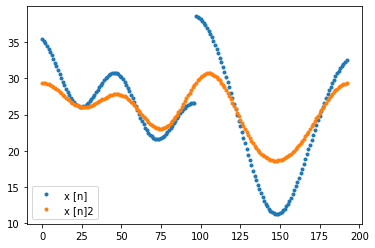

In [64]:
pl.plot(dataframe['n'],dataframe['x[n]'],'.',label='x [n]')
pl.plot(dataframe['n'],dataframe['x[n]2'],'.',label='x [n]2')
pl.legend(loc='lower left')